![agents](images/header.jpg)
# Análisis léxico
### Ramón Soto C. [(rsotoc@moviquest.com)](mailto:rsotoc@moviquest.com/)
[ver en nbviewer](http://nbviewer.ipython.org/github/rsotoc/nlp/blob/master/Introducción.ipynb)

![ ](images/blank.png)
## Definición

El análisis léxico es la etapa del análisis de texto a nivel de palabras. Su objetivo es tomar un flujo de caracteres y transformarlo en una secuencia de *lexemas*. Una estrategia común es realizar previamente la fase de tokenización, de manera que el analizador léxico reciba un flujo de tokens y su trabajo se limite a asociar cada token con el *lexema* correspondiente.

![](images/nlp02c.png)


## Lexemas

En su acepción más simple, particularmente empleada en el área de procesamiento de lenguaje natural, un lexema es básicamente una palabra, un token y, por lo tanto, el análisis léxico se limita, básicamente a la tokenización. Sin embargo, desde un punto de vista lingüístico, un lexema tiene un significado especial; el **lexema** se define como una unidad mínima de significado que existe independientemente de la cantidad de palabras asociadas a él. La interpretación de esta definición puede variar dependiendo del idioma. 

En español, el lexema es la base léxica o raíz de una palabra, esto es, la parte que se mantiene invariable en todas las palabras de una misma familia, por ejemplo, en la palabra *niño* el lexema es *niñ* que da lugar a una familia de palabras que comparten un significado común; las palabras se suelen completar con un morfema que define las flexiones de una palabra.

En inglés, el lexema es una forma genérica que define a una palabra (y que coincide con la palabra "principal" de la familia); es la palabra que se usa de encabezado en un diccionario.

![](images/lexeme.png)

En un sentido más amplio, particularmente en el contexto de PLN, un lexema es un componente básico con significado en un lenguaje. El objetivo del análisis léxico es identificar tales componentes en un texto, así como sus características léxicas. 

El conjunto de características que se desea identificar depende de la aplicación.

## Lexicones

Al conjunto de lexemas en un contexto determinado se le denomina "lexicón". El uso de lexicones en PLN es una de las aproximaciones más empleadas debido a sus resultados prácticos. Aunque existen lexicones genéricos para muchos idiomas, su utilidad es limitada, por lo que es necesario construir lexicones específicos para cada contexto. La idea básica en la construcción de un lexicón es optimizar la cantidad de términos en el diccionario: muchas palabras permiten reconocer muchas características en un texto, pero representan un alto costo computacional; pocos términos en el lexicón es computacionalmente manejable, pero carece de capacidad para reconocer las características de un texto.

A continuación, construiremos un lexicón a partir de las letras de canciones del cantautor  y poeta español [Javier Krahe](http://www.proyectokrahe.org/index.php/Página_Principal). Este lexicón debería describir el lenguaje utilizado por el autor en sus canciones.

![](images/krahe2.jpg)

In [1]:
import os
from IPython.display import display
import pandas as pd
# Modificar la longitud de caracteres en una celda que se imprimirán 
pd.options.display.max_colwidth = 150 
import nltk
from nltk.tokenize import word_tokenize
import string

Leemos las letras desde nuestro repositorio local y realizamos una limpieza básica, eliminando signos especiales y segmentando en palabras cada canción:

In [2]:
os.chdir('Data sets/Krahe/lyrics')
kraheDf = pd.DataFrame(columns=["lyrics"])

listing = os.listdir()
for i, l in enumerate(listing) :
    file = open(l, encoding='utf-8')
    raw = file.read().lower()
    file.close()
    kraheDf.loc[i] = [raw]
os.chdir('../../')
#Guardar el cancionero para posteriores usos
kraheDf.to_json("krahe/krahe.json", orient='records') 
print("Cantidad de documentos: ", len(kraheDf))

Cantidad de documentos:  137


In [3]:
puncList = [".", ";", ":", "¡", "!", "¿", "?", "/", "\\", ",", ")", "(", "\"", "-", "*"]

kraheDf["words"] = None    
for index, row in kraheDf.iterrows():
    words = row.lyrics.split()
    for punc in puncList:
        words = [word.replace(punc,'') for word in words]
    row.words = words

display(kraheDf.head())
print("\nCanción ejemplo:\n\n", kraheDf.lyrics[0])

,lyrics,words
0,"abajo el alzheimer\nsí, que los recuerdo, fueron los mejores,\ncon muchos detalles y vivos colores\naquí van las cuentas de mis cien amores.\nveam...","[abajo, el, alzheimer, sí, que, los, recuerdo, fueron, los, mejores, con, muchos, detalles, y, vivos, colores, aquí, van, las, cuentas, de, mis, c..."
1,"agua, ajo y resina\nva de veras ya por fin,\ntu bella dama te ha dejado,\nte llegó tu san martín.\nte lo temías, todo aquello se sopesa.\nte lo te...","[agua, ajo, y, resina, va, de, veras, ya, por, fin, tu, bella, dama, te, ha, dejado, te, llegó, tu, san, martín, te, lo, temías, todo, aquello, se..."
2,"agua de la fuente\nese canto neutro que en mi alma callada\nes monotonía o es ruido o es nada,\ncanto de la fuente. en mi alma sonora\na veces son...","[agua, de, la, fuente, ese, canto, neutro, que, en, mi, alma, callada, es, monotonía, o, es, ruido, o, es, nada, canto, de, la, fuente, en, mi, al..."
3,alta velocidad\nme monto en el ave\nque rápido y suave\nme lleva a sevilla.\nya estoy en sevilla.\nno vine a sevilla\na ver la giralda\nsino a ver...,"[alta, velocidad, me, monto, en, el, ave, que, rápido, y, suave, me, lleva, a, sevilla, ya, estoy, en, sevilla, no, vine, a, sevilla, a, ver, la, ..."
4,"antípodas\nen las antípodas todo es idéntico,\ntienen teléfonos, tienen semáforos\ncon automóviles con sancristóbales,\nmuchos estómagos están a r...","[antípodas, en, las, antípodas, todo, es, idéntico, tienen, teléfonos, tienen, semáforos, con, automóviles, con, sancristóbales, muchos, estómagos..."



Canción ejemplo:

 abajo el alzheimer
sí, que los recuerdo, fueron los mejores,
con muchos detalles y vivos colores
aquí van las cuentas de mis cien amores.
veamos si tengo o no tengo memoria.
un amor eterno, otros casi tanto.
de siempre me prenden los cinco en su encanto,
tan sólo por ellas he vertido el llanto.
peaje de amor, cantidad irrisoria.
amores de suerte, amores de paso,
amores refugio, amores al raso,
parques del retiro, museos picasso.
incluso una suite en el waldorf astoria.
amores insólitos por lo singulares,
hay reinas del mar por los siete mares.
de amores sin par, unos quince pares.
y todas tangibles, ninguna ilusoria.
descuéntame uno y van treinta y cuatro,
el uno que tacho fue puro teatro,
una tontería y no lo idolatro.
ocurre que es que no tuve escapatoria.
de cinco minutos, de media mañana,
de fin de mi vida, de fin de semana,
por el via amoris de mi real gana.
cada uno su cruz y hoy la mía es de gloria.
amores de ida, amores de vuelta,
amores debidos al ebro y al

A continuación, un análisis básico de las frecuencias de las palabras en el corpus:

Cantidad de palabras en el corpus:  35364

Palabras más populares:
 [('y', 1405), ('de', 1377), ('que', 1231), ('la', 926), ('a', 816), ('el', 756), ('en', 671), ('me', 644), ('no', 608), ('un', 592), ('es', 448), ('mi', 392), ('lo', 365), ('por', 348), ('con', 321), ('se', 304), ('al', 300), ('si', 232), ('su', 230), ('los', 224), ('yo', 224), ('te', 215), ('qué', 215), ('del', 195), ('ya', 195), ('una', 193), ('tu', 192), ('las', 187), ('pero', 179), ('más', 142), ('o', 139), ('como', 138), ('mis', 130), ('tú', 124), ('sin', 120), ('le', 116), ('para', 104), ('todo', 102), ('ni', 101), ('muy', 100), ('cuando', 98), ('bien', 90), ('ser', 90), ('eso', 85), ('tus', 85), ('aún', 85), ('hay', 84), ('sus', 84), ('vez', 78), ('tal', 76)]


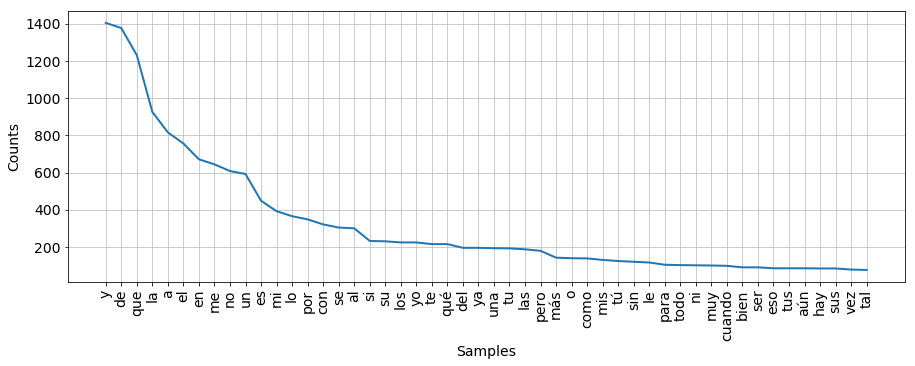

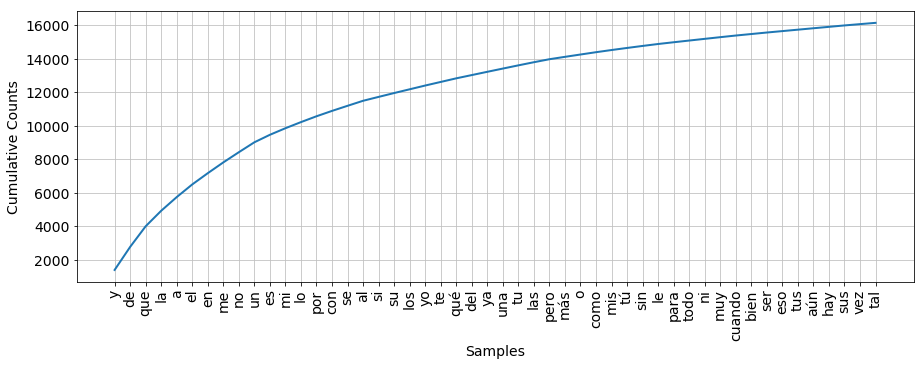

In [4]:
all_words = []
for row in kraheDf.words:
    all_words.extend(row)
most_common_words = nltk.FreqDist(all_words)

print("Cantidad de palabras en el corpus: ", most_common_words.N())
print("\nPalabras más populares:\n", most_common_words.most_common(50))

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(15, 5))
most_common_words.plot(50, cumulative=False)
plt.figure(figsize=(15, 5))
most_common_words.plot(50, cumulative=True)

Como es usual, las palabras más frecuentes carecen de representatividad, en su mayoría son palabras frecuentes del español. Eliminamos las palabras de paro (genéricas, según el diccionario en la biblioteca NLTK):

In [5]:
from nltk.corpus import stopwords 
stops = set(stopwords.words("spanish"))
#palabras sin palabras de paro y desechamos cadenas vacías aún en la lista de palabras
kraheDf["words_wsw"] = list(map(lambda row: [w for w in row if not w in stops and len(w)>0], 
                                   kraheDf.words))
display(kraheDf.head())

,lyrics,words,words_wsw
0,"abajo el alzheimer\nsí, que los recuerdo, fueron los mejores,\ncon muchos detalles y vivos colores\naquí van las cuentas de mis cien amores.\nveam...","[abajo, el, alzheimer, sí, que, los, recuerdo, fueron, los, mejores, con, muchos, detalles, y, vivos, colores, aquí, van, las, cuentas, de, mis, c...","[abajo, alzheimer, recuerdo, mejores, detalles, vivos, colores, aquí, van, cuentas, cien, amores, veamos, si, memoria, amor, eterno, casi, siempre..."
1,"agua, ajo y resina\nva de veras ya por fin,\ntu bella dama te ha dejado,\nte llegó tu san martín.\nte lo temías, todo aquello se sopesa.\nte lo te...","[agua, ajo, y, resina, va, de, veras, ya, por, fin, tu, bella, dama, te, ha, dejado, te, llegó, tu, san, martín, te, lo, temías, todo, aquello, se...","[agua, ajo, resina, va, veras, fin, bella, dama, dejado, llegó, san, martín, temías, aquello, sopesa, temías, vino, sorpresa, creías, cuanto, decí..."
2,"agua de la fuente\nese canto neutro que en mi alma callada\nes monotonía o es ruido o es nada,\ncanto de la fuente. en mi alma sonora\na veces son...","[agua, de, la, fuente, ese, canto, neutro, que, en, mi, alma, callada, es, monotonía, o, es, ruido, o, es, nada, canto, de, la, fuente, en, mi, al...","[agua, fuente, canto, neutro, alma, callada, monotonía, ruido, canto, fuente, alma, sonora, veces, sonríe, veces, sonllora, fuente, dices, chorro,..."
3,alta velocidad\nme monto en el ave\nque rápido y suave\nme lleva a sevilla.\nya estoy en sevilla.\nno vine a sevilla\na ver la giralda\nsino a ver...,"[alta, velocidad, me, monto, en, el, ave, que, rápido, y, suave, me, lleva, a, sevilla, ya, estoy, en, sevilla, no, vine, a, sevilla, a, ver, la, ...","[alta, velocidad, monto, ave, rápido, suave, lleva, sevilla, sevilla, vine, sevilla, ver, giralda, sino, verte, alzo, falda, chaf, chaf, bien, cuá..."
4,"antípodas\nen las antípodas todo es idéntico,\ntienen teléfonos, tienen semáforos\ncon automóviles con sancristóbales,\nmuchos estómagos están a r...","[antípodas, en, las, antípodas, todo, es, idéntico, tienen, teléfonos, tienen, semáforos, con, automóviles, con, sancristóbales, muchos, estómagos...","[antípodas, antípodas, idéntico, teléfonos, semáforos, automóviles, sancristóbales, estómagos, régimen, políticos, bien, estúpidos, súbditos, pusi..."


## TF-IDF

**[TF-IDF](https://en.wikipedia.org/wiki/Tf–idf)** (*term frequency–inverse document frequency*) es una medida de la importancia discriminante de una palabra en un documento perteneciente a un corpus. Esta cantidad se forma por dos componentes:

* **TF** (frecuencia del término), describe qué tanto se emplea un término en un documento. La lógica de este componente es que mientras más veces aparece un término en un documento, más representativo es del mismo. Existen diversa maneras de calcular este valor, siendo la más simple el conteo directo del término en el documento. La mayoría de las opciones, sin embargo, utilizan alguna variante basada en la frecuencia relativa del término en el documento. 

$$
tf(t, d) = \frac{\textrm{Número de veces que aparece el término }t\textrm{ en el documento }d}
{\textrm{Número de términos en el documento }d} 
$$

* **IDF** (frecuencia inversa del documento), representa la frecuencia con que es empleado el término en el corpus. Un término que es utilizado con mucha frecuencia en el contexto, es poco  discriminante. La forma básica de calcular esta cantidad es como el inverso de la frecuencia de documentos en que aparece el término (escalado logarítmicamente).

$$
idf(t, D) = \log\frac{\textrm{Número de documentos en el corpus }D}
{\textrm{Número de documentos en el corpus }D\textrm{ donde aparece el término t}} 
$$

El valor de TF para un término/palabra es específico para cada documento, mientras que IDF es un valor global del término en el corpus. El valor de TF-IDF se obtiene multiplicando los valores de TF e IDF:

$$
tfidf(t, d, D) = tf(t, d)\cdot idf(t, D)
$$

Durante la construcción de un lexicón podemos emplear estas ideas para depurar, de forma automática, el conjunto de palabras. Analicemos las estadísticas de las palabras depuradas, después de eliminar las palabras de paro.

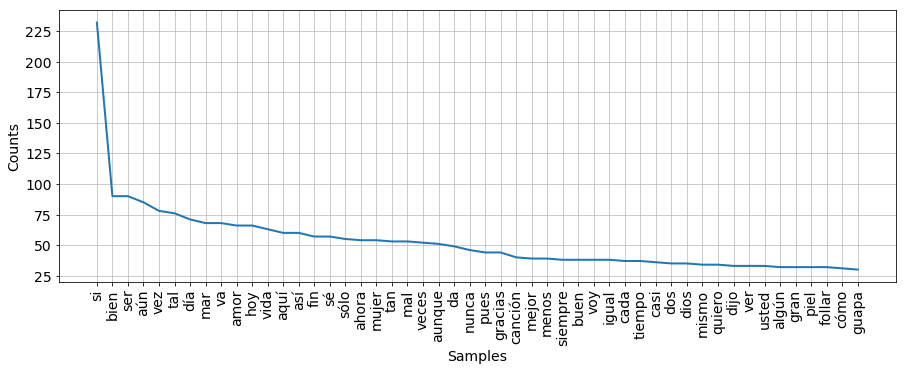

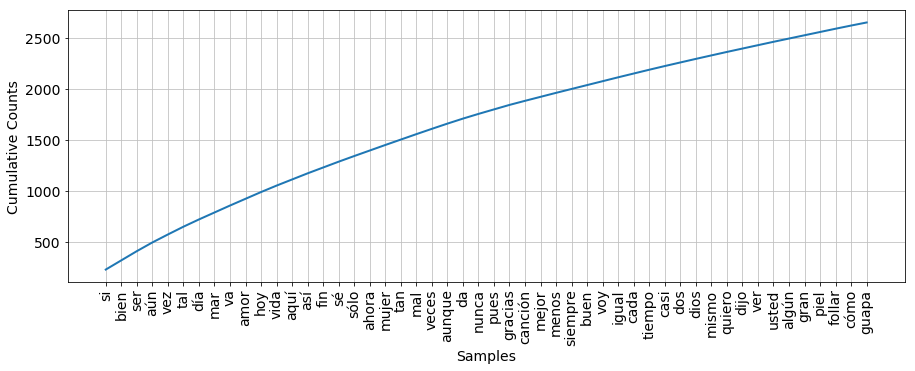

Cantidad de palabras en el corpus:  17434
Cantidad de palabras diferentes:  6996

Palabras utilizadas una vez: 4542
Muestra:
['alzheimer', 'veamos', 'prenden', 'vertido', 'peaje', 'irrisoria', 'refugio', 'parques', 'museos', 'suite', 'waldorf', 'astoria', 'insólitos', 'singulares', 'quince', 'tangibles', 'ilusoria', 'descuéntame', 'tontería', 'idolatro']


In [6]:
all_words2 = []
for row in kraheDf.words_wsw:
    all_words2.extend(row)
most_common_words2 = nltk.FreqDist(all_words2)

plt.figure(figsize=(15, 5))
most_common_words2.plot(50, cumulative=False)
plt.figure(figsize=(15, 5))
most_common_words2.plot(50, cumulative=True)

print("Cantidad de palabras en el corpus: ", most_common_words2.N())
numWords = len(most_common_words2.most_common())
print("Cantidad de palabras diferentes: ", numWords)

uselessWords = most_common_words2.hapaxes() #Obtiene las palabras que sólo aparecen una vez
print("\nPalabras utilizadas una vez: {}\nMuestra:\n{}"
      .format(most_common_words2.Nr(1), uselessWords[:20]))

El corpus que estamos utilizando es pequeño: 137 canciones que acumulan un total de 17434 palabras; con un conjunto total de palabras (diferentes) de 6996. Este conjunto de palabras es muy amplio (40% del total de palabras empleadas), si se considera que el vocabiulario de reserva de una persona promedio es de alrededor de 5000 palabras y se afirma que Miguel de Cervantes utilizó alrededor de 8000 [palabras en toda su obra](http://zonadelescribidor.blogspot.mx/2008/12/cuntas-palabras-usamos-al-hablar-en.html). Es de esperarse que muchas palabras no aparezcan con frecuencia. Esto hace difícil poder emplear una estrategia como la de TF-IDF. Sin embargo, podemos utilizar algunas ideas relacionadas. Lo primero que observamos del análisis anterior, es que hay 4542 palabras que sólo aparecen una vez en toda la obra. Esas palabras tienen muy baja capacidad discriminante, desde un punto de vista estadístico. Cuando estas palabras se analizan semánticamente, su capacidad descriptiva puede ser alta, pero esa evalaución no puede realizarse de forma automática; se requiere que un experto le asigne un peso a cada palabra.

Buscamos palabras que no sean muy comunes, pero que tampoco sean de uso único, así que, eliminaremos las palabras que sólo aparecen una vez en todo el corpus. Aprovechamos para eliminar la palabra "si" que representa un pico de frecuencia y que no parece particularmente significativa.

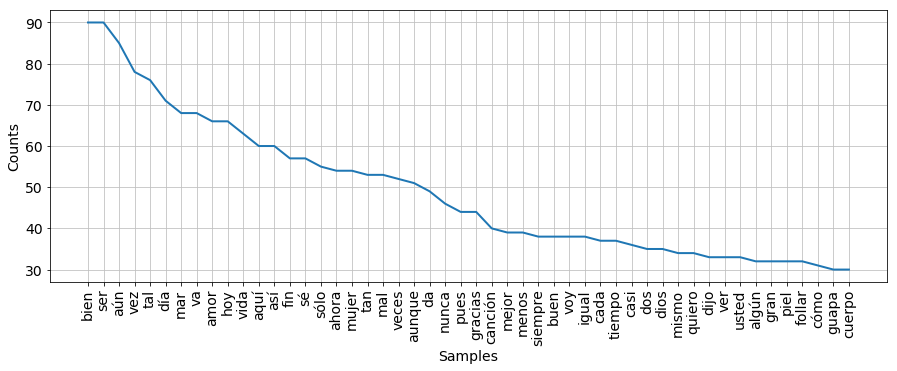

Cantidad de palabras útiles:  2453


In [7]:
uselessWords.append('si')
my_stops = set(uselessWords)                  
kraheDf["clean_words"] = list(map(lambda row: [w for w in row if not w in my_stops], 
                                   kraheDf.words_wsw))
all_words3 = []
for row in kraheDf.clean_words:
    all_words3.extend(row)
most_common_words3 = nltk.FreqDist(all_words3)

plt.figure(figsize=(15, 5))
most_common_words3.plot(50, cumulative=False)

numWords2 = len(most_common_words3.most_common())
print("Cantidad de palabras útiles: ", numWords2)

Ahora, el lexicón se ha reducido a 2453 palabras (de un total original de 6996). Presentamos las palabras remanentes en cada documento y presentamos el texto original. El análisis (subjetivo) que debemos hacer es si estas palabras mantienen el significado fundamental del texto original:

In [8]:
for i in range(3,5):
    row = kraheDf.iloc[i]
    print(row.clean_words)
    print(row.lyrics)

['alta', 'monto', 'ave', 'rápido', 'suave', 'lleva', 'sevilla', 'sevilla', 'sevilla', 'ver', 'sino', 'verte', 'alzo', 'falda', 'chaf', 'chaf', 'bien', 'cuánto', 'amor', 'monto', 'ave', 'rápido', 'suave', 'vuelve', 'madrid', 'madrid']
alta velocidad
me monto en el ave
que rápido y suave
me lleva a sevilla.
ya estoy en sevilla.
no vine a sevilla
a ver la giralda
sino a verte a ti.
y le alzo la falda.
¡chaf, chaf, qué bien,
cuánto amor! aaaah.
me monto en el ave
que rápido y suave
me vuelve a madrid.
ya estoy en madrid.

['antípodas', 'antípodas', 'idéntico', 'bien', 'antípodas', 'idéntico', 'idéntico', 'autóctono', 'ves', 'sino', 'antípodas', 'idéntico', 'idéntico', 'autóctono', 'mundo', 'gente', 'mundo', 'cuerpo', 'gente', 'ciertos', 'antípodas', 'idéntico', 'idéntico', 'autóctono', 'gran', 'lógico', 'muchas', 'muchas', 'medidas', 'antípodas', 'idéntico', 'idéntico', 'autóctono', 'hazañas', 'actos', 'actos', 'antípodas', 'idéntico', 'idéntico', 'autóctono', 'dan', 'rara', 'idéntico', 'a

Extendemos la regla de limpieza para seleccionar sólo aquellas palabras que aparecen en al menos 3 canciones, cantidad que sigue siendo pequeña.

In [9]:
words_krahe = set(all_words3)
idf_dict = dict(zip(words_krahe, [0]*len(words_krahe)))

# Eiminar elementos que aparecen en menos de 3 (arbitrario) documentos
numDocs = len(kraheDf)
for w in words_krahe:
    for d in kraheDf.clean_words:
        if w in d:
            idf_dict[w] = idf_dict.get(w) + 1
    if(idf_dict.get(w) < 3):
        idf_dict.pop(w)
            
print("Términos que aparecen en al menos 3 documentos: ", len(idf_dict))

Términos que aparecen en al menos 3 documentos:  938


Las palabras restantes más frecuentes y su representatividad son:

In [10]:
from operator import itemgetter
ordered_idf_words = sorted(idf_dict.items(), key=itemgetter(1), reverse=True)

table = []
for i in range(15):
    table.append(ordered_idf_words[i*8:i*8+8])

df = pd.DataFrame(table)
display(df)

all_words4 = list(idf_dict.keys())
kraheDf["meaning_words"] = list(map(lambda row: [w for w in row if  w in all_words4], 
                                   kraheDf.clean_words))

,0,1,2,3,4,5,6,7
0,"(bien, 52)","(aún, 49)","(amor, 49)","(así, 47)","(tan, 45)","(día, 43)","(aquí, 41)","(sólo, 39)"
1,"(vez, 39)","(ser, 38)","(vida, 36)","(fin, 36)","(hoy, 35)","(pues, 34)","(mar, 34)","(aunque, 34)"
2,"(ahora, 33)","(sé, 33)","(va, 32)","(mujer, 32)","(mal, 32)","(tal, 31)","(voy, 31)","(menos, 31)"
3,"(siempre, 29)","(nunca, 29)","(cada, 29)","(da, 27)","(igual, 26)","(algún, 26)","(dijo, 26)","(mejor, 25)"
4,"(gran, 25)","(piel, 25)","(ver, 25)","(tiempo, 24)","(buen, 23)","(corazón, 23)","(cuerpo, 22)","(dios, 22)"
5,"(veces, 22)","(quiero, 21)","(dos, 21)","(mismo, 20)","(canción, 20)","(besos, 20)","(hace, 19)","(ahí, 19)"
6,"(mano, 19)","(nuevo, 19)","(casi, 19)","(cómo, 19)","(mundo, 18)","(tres, 18)","(dice, 18)","(después, 17)"
7,"(ir, 17)","(mientras, 17)","(luz, 17)","(hacer, 17)","(tras, 17)","(pobre, 16)","(paso, 16)","(claro, 16)"
8,"(decir, 16)","(toda, 16)","(alma, 16)","(sol, 16)","(luego, 16)","(noche, 16)","(cuanto, 16)","(días, 16)"
9,"(buena, 16)","(deja, 15)","(gracias, 15)","(adiós, 15)","(labios, 15)","(quién, 15)","(voz, 15)","(veo, 15)"


In [11]:
for i in range(3,5):
    row = kraheDf.iloc[i]
    print(row.meaning_words)
    print(row.lyrics)

['monto', 'suave', 'lleva', 'ver', 'sino', 'verte', 'bien', 'cuánto', 'amor', 'monto', 'suave', 'vuelve']
alta velocidad
me monto en el ave
que rápido y suave
me lleva a sevilla.
ya estoy en sevilla.
no vine a sevilla
a ver la giralda
sino a verte a ti.
y le alzo la falda.
¡chaf, chaf, qué bien,
cuánto amor! aaaah.
me monto en el ave
que rápido y suave
me vuelve a madrid.
ya estoy en madrid.

['bien', 'ves', 'sino', 'mundo', 'gente', 'mundo', 'cuerpo', 'gente', 'ciertos', 'gran', 'muchas', 'muchas', 'medidas', 'dan', 'rara', 'grandes', 'lunes', 'dan', 'espectáculo', 'allí']
antípodas
en las antípodas todo es idéntico,
tienen teléfonos, tienen semáforos
con automóviles con sancristóbales,
muchos estómagos están a régimen.
tienen políticos más bien estúpidos
pero son súbditos muy pusilánimes.
en las antípodas todo es idéntico,
idéntico a lo autóctono.
la problemática es económica
y en lo teórico no son unánimes,
los hay escépticos, los hay fanáticos,
pero en la práctica no ves apóstatas


Aunque parte del proceso de construcción del lexicón se puede automatizar aún más, mediante aprendizaje supervisado, por ejemplo, es conveniente el análisis manual por parte de un experto. En la tabla anterior, por ejemplo, observamos palabras como "*hay*" o palabras que típicamente no se toman en cuenta en el análisis de textos, como son los números. Estas palabras (ejemplificadas en rojo en la imagen siguiente) suelen ser eliminadas del lexicón. También se observan palabras como "*ahora*" y "*hoy*" que pueden ser consideradas como sinónimos en muchos casos y que pueden integrarse en un sólo concepto/lexema, lo mismo que en el caso de variantes de un verbo, "*ver*", "*veo*", "*ves*" y "*vi*",  por ejemplo.

![](images/lexicon01.png)

## Creando un lexicón con textos de Wikipedia

Repositorios de documentos como [Wikipedia](https://en.wikipedia.org/wiki/Main_Page) pueden ser una excelente fuente de datos para la creación de lexicones. En el caso de Wikipedia, los documentos están redactados por muy diversas personas, por lo que el lenguaje puede esperarse que sea muy diverso, pero centrado en torno a una temática.

Ejemplificaremos con la construcción de un lexicón para descripción de personajes de [comics](https://en.wikipedia.org/wiki/Comics).

El primer paso es descargar la información. Para descargar múltiples páginas utilizamos la herramienta [Special:Export](https://en.wikipedia.org/wiki/Special:Export):

![](images/wiki_lex.png)

Una vez descargado el archivo, lo abrimos y hacemos una primera exploración (asumiendo que el archivo xml debe tener una estructura de árbol):

In [12]:
import xml.etree.ElementTree as ET

tree = ET.parse("Comics/all_characters.xml")
root = tree.getroot()

print(root.tag, root.text)
for row, child in zip(range(3), root):
    print("1 ", child.tag, child.attrib)
    for grandchild in child:
        print("2   ", grandchild.tag, grandchild.attrib)
        for grand2child in grandchild:
            print("3     ", grand2child.tag, grand2child.attrib)
    print()

{http://www.mediawiki.org/xml/export-0.10/}mediawiki 
  
1  {http://www.mediawiki.org/xml/export-0.10/}siteinfo {}
2    {http://www.mediawiki.org/xml/export-0.10/}sitename {}
2    {http://www.mediawiki.org/xml/export-0.10/}dbname {}
2    {http://www.mediawiki.org/xml/export-0.10/}base {}
2    {http://www.mediawiki.org/xml/export-0.10/}generator {}
2    {http://www.mediawiki.org/xml/export-0.10/}case {}
2    {http://www.mediawiki.org/xml/export-0.10/}namespaces {}
3      {http://www.mediawiki.org/xml/export-0.10/}namespace {'key': '-2', 'case': 'first-letter'}
3      {http://www.mediawiki.org/xml/export-0.10/}namespace {'key': '-1', 'case': 'first-letter'}
3      {http://www.mediawiki.org/xml/export-0.10/}namespace {'key': '0', 'case': 'first-letter'}
3      {http://www.mediawiki.org/xml/export-0.10/}namespace {'key': '1', 'case': 'first-letter'}
3      {http://www.mediawiki.org/xml/export-0.10/}namespace {'key': '2', 'case': 'first-letter'}
3      {http://www.mediawiki.org/xml/export-0

En estos resultados, etiquetamos como 1, 2 y 3 los niveles descendientes del nodo raíz y posteriores. Una exploración detallada muestra que los nodos que nos interesan son:

* ```{http://www.mediawiki.org/xml/export-0.10/}page {}``` en el nivel 1,
* ```{http://www.mediawiki.org/xml/export-0.10/}title {}``` en el nivel 2,
* ```{http://www.mediawiki.org/xml/export-0.10/}revision {}``` en el nivel 2 y
* ```{http://www.mediawiki.org/xml/export-0.10/}text {...}``` en el nivel 3.

A continuación obervamos más a detalle los elementos al nivel 1:

In [13]:
for index, child in zip(range(len(root)), root):
    if(child.tag.find("page") < 0):
        print(index, child.tag)

0 {http://www.mediawiki.org/xml/export-0.10/}siteinfo


El unico nodo que no nos interesa a este nivel  es ```root[0]```

In [14]:
#Descartamos el primer hijo y analizamos el segundo
child = root[1]
for grandchild in child:
    if(grandchild.tag.find("title") >= 0):
        title = grandchild.text
        print(title)
    if(grandchild.tag.find("revision") >= 0): 
        for grand2child in grandchild:
            if(grand2child.tag.find("text") >= 0):
                text = grand2child.text
                print(text)

'Mazing Man
{{Superherobox <!--Wikipedia:WikiProject Comics-->
| image =
|converted=y 
| caption = Cover to '' 'Mazing Man'' #1
| publisher = [[DC Comics]]
| debut = '' 'Mazing Man'' #1 (January 1986)
| creators = [[Bob Rozakis]] (script)<br />[[Stephen DeStefano]] (art)
| alter_ego = Sigfried Horatio Hunch III
| full_name =
| species = <!-- optional -->
| homeworld = <!-- optional -->
| alliances = <!-- optional -->
| aliases = <!-- optional: actual identities the character uses, not nicknames -->
| supports=<!--optional-->
| powers = 
| cat            = super
| subcat         = DC Comics
| hero           = y
| villain        = 
| sortkey        = Mazing Man
| addcharcat#    = 
}}
''''Mazing Man''' is the title character of a [[comic book]] series created by [[Bob Rozakis]] and [[Stephen DeStefano]] and published by [[DC Comics]]. The series ran for twelve issues in 1986, with additional special issues in 1987, 1988, and 1990.  In addition, 'Mazing Man had an origin story in ''[[Secre

Realizamos la limpieza del texto:

In [15]:
from bs4 import BeautifulSoup
import re

APOSTROFOS = {"aren't" : "are not", "can't" : "cannot", "couldn't" : "could not", "didn't" : "did not", 
              "doesn't" : "does not", "don't" : "do not", "hadn't" : "had not", "hasn't" : "has not", 
              "haven't" : "have not", "he's" : "he is", "I'll" : "I will", "I'm" : "I am", "I've" : "I have", 
              "isn't" : "is not", "it's" : "it is", "let's" : "let us", "mustn't" : "must not", 
              "shan't" : "shall not", "she'll" : "she will", "she's" : "she is", "shouldn't" : "should not", 
              "that's" : "that is", "there's" : "there is", "they're" : "they are", "they've" : "they have", 
              "we're" : "we are", "we've" : "we have", "weren't" : "were not", "what're" : "what are", 
              "what's" : "what is", "what've" : "what have", "where's" : "where is", "who're" : "who are", 
              "who's" : "who is", "who've" : "who have", "won't" : "will not", "wouldn't" : "would not", 
              "you're" : "you are", "you've" : "you have"} 

child = root[1]
for grandchild in child:
    if(grandchild.tag.find("title") >= 0):
        title = grandchild.text
        print(title)
    if(grandchild.tag.find("revision") >= 0): 
        for grand2child in grandchild:
            if(grand2child.tag.find("text") >= 0):
                #Obtener el texto del nodo
                text = grand2child.text.lower()
                #Eliminar las cadenas que inician en {{ seguidas de 
                #cualquier cosa excepto }} y terminadas con }}
                text = re.sub('{{[^}}]*}}', '', text)
                #Misma idea, pero con el caracter especial \[ \] y Category:
                text = re.sub('\[\[Category:[^\]\]]*\]\]', '', text)
                #... y entre === ===
                text = re.sub('={3}[\w]+={3}', '', text)
                #... y entre == ==
                text = re.sub('={2}[\w]+={2}', '', text)
                #Extrae el texto de entre el código html... casi
                text = BeautifulSoup(text, "lxml").get_text()
                text = re.sub("<img([\w\W]+?)/?>", "", text)
                #Eliminar direcciones http
                text = re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ', text) 
                #... y direcciones de correo
                text = re.sub('[\w\.-]+@[\w\.-]+', " ", text)
                #... y direcciones wikt*
                text = re.sub('\[\[wikt[^|]*|', '', text)
                #Eliminar puntos decorativos como en S.H.I.E.L.D.
                text = text.replace(".","")
                
                words = text.split()
                #Reenplazar el usos de apostrofos
                texto = [APOSTROFOS[word] if word in APOSTROFOS else word for word in words]
                texto = " ".join(texto)
                #Eliminar otros caracteres no alfabéticos
                texto = re.sub("[^\w*]", " ", texto)
                texto = re.sub("[\d]", " ", texto)
                #Eliminar palabras repetidas consecutivas
                words = re.sub(r'\b(\w+)(\s+\1\b)+', r'\1', texto).split()
                texto = " ".join(words)
                
                print(texto)

'Mazing Man
mazing man is the title character of a comic book series created by bob rozakis and stephen destefano and published by dc comics the series ran for twelve issues in with additional special issues in and in addition mazing man had an origin story in secret origins and an original one page story that appeared in an ad in comics buyer s guide series overview the mazing man series depicts the misadventures of sigfried horatio hunch iii a benignly deranged little man in queens new york queens new york city new york state new york who dresses in a homemade costume and performs deeds like unclogging drains and watching out for local children viewed as a harmless kook by his neighbors he saves a child from being hit by a truck in the first issue earning him some respect and notoriety not to mention a steady stream of appreciation and food from the mother in subsequent issues maze tends to sing simon and garfunkel songs when struck on the head his best friend is denton fixx a writer

A continuación, con el procedimiento de limpieza probado, procesamos todo el archivo xml y creamos un objeto *Dataframe*. 

,name,description,words_wsw
0,'Mazing Man,mazing man is the title character of a comic book series created by bob rozakis and stephen destefano and published by dc comics the series ran fo...,"[mazing, man, title, character, comic, book, series, created, bob, rozakis, stephen, destefano, published, dc, comics, series, ran, twelve, issues..."
1,711 (Quality Comics),is a fictional superhero from the golden age of comics he was created by george brenner and published by quality comics first appeared in police c...,"[fictional, superhero, golden, age, comics, created, george, brenner, published, quality, comics, first, appeared, police, comics, august, lasted,..."
2,Abigail Brand,special agent special agent abigail brand is a fictional character appearing in american comic book s published by marvel comics publication histo...,"[special, agent, special, agent, abigail, brand, fictional, character, appearing, american, comic, book, published, marvel, comics, publication, h..."
3,Abin Sur,abin sur is a fictional character and a superhero from the dc comics dc universe he was a member of the green lantern corps and is best known as t...,"[abin, sur, fictional, character, superhero, dc, comics, dc, universe, member, green, lantern, corps, best, known, predecessor, green, lantern, ha..."
4,Abner Jenkins,abner ronald jenkins formerly known as the beetle comics beetle mach iv mach v mach vii and currently known as mach x and is a fictional character...,"[abner, ronald, jenkins, formerly, known, beetle, comics, beetle, mach, iv, mach, v, mach, vii, currently, known, mach, x, fictional, character, a..."


Cantidad de palabras en el corpus:  2205523
Cantidad de palabras diferentes:  49628
Palabras utilizadas una vez:  16280

Palabras más populares:
 [('comics', 41536), ('marvel', 17505), ('category', 15050), ('x', 14673), ('man', 12903), ('new', 12235), ('character', 10373), ('men', 10000), ('series', 9847), ('vol', 9053), ('dc', 8886), ('characters', 8771), ('one', 8414), ('later', 8102), ('avengers', 7908), ('also', 7774), ('powers', 7745), ('fictional', 7367), ('spider', 7353), ('first', 7260), ('time', 7109), ('team', 6849), ('earth', 6844), ('black', 5526), ('justice', 5354), ('comic', 5349), ('created', 5297), ('batman', 5272), ('appears', 5212), ('power', 5085), ('superman', 5082), ('captain', 4824), ('two', 4558), ('green', 4399), ('universe', 4379), ('heroes', 4261), ('would', 4232), ('book', 4102), ('appeared', 4096), ('america', 3985), ('super', 3980), ('league', 3978), ('war', 3949), ('however', 3731), ('world', 3701), ('battle', 3699), ('member', 3667), ('issue', 3580), ('de

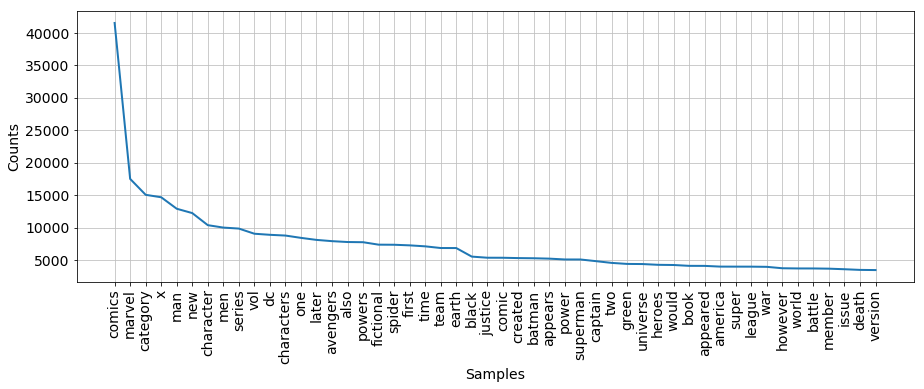

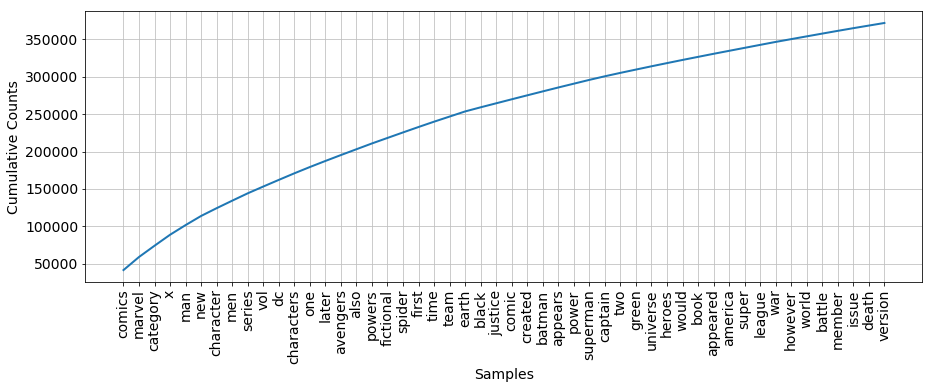

In [16]:
comicsDf = pd.DataFrame(columns=["name", "description"])

index = 0
for child in root:
    if(child.tag.find("page") >=0 ):
        for grandchild in child:
            if(grandchild.tag.find("title") >= 0):
                  title = grandchild.text
            if(grandchild.tag.find("revision") >= 0): 
                for grand2child in grandchild:
                    if(grand2child.tag.find("text") >= 0):
                        #Obtener el texto del nodo
                        text = grand2child.text.lower()
                        #Eliminar las cadenas que inician en {{ seguidas de 
                        #cualquier cosa excepto }} y terminadas con }}
                        text = re.sub('{{[^}}]*}}', '', text)
                        #Misma idea, pero con el caracter especial \[ \] y Category:
                        text = re.sub('\[\[Category:[^\]\]]*\]\]', '', text)
                        #... y entre === ===
                        text = re.sub('={3}[\w]+={3}', '', text)
                        #... y entre == ==
                        text = re.sub('={2}[\w]+={2}', '', text)
                        #Extrae el texto de entre el código html... casi
                        text = BeautifulSoup(text, "lxml").get_text() 
                        text = re.sub("<img([\w\W]+?)/?>", "", text)
                        #Eliminar direcciones http
                        text = re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ', text) 
                        #... y direcciones de correo
                        text = re.sub('[\w\.-]+@[\w\.-]+', " ", text)
                        #... y direcciones wikt*
                        text = re.sub('\[\[wikt[^|]*|', '', text)
                        #Eliminar puntos decorativos como en S.H.I.E.L.D.
                        text = text.replace(".","")

                        words = text.split()
                        #Reenplazar el usos de apostrofos
                        texto = [APOSTROFOS[word] if word in APOSTROFOS else word for word in words]
                        texto = " ".join(texto)
                        #Eliminar otros caracteres no alfabéticos
                        texto = re.sub("[^\w*]", " ", texto)
                        texto = re.sub("[\d]", " ", texto)
                        #Eliminar palabras repetidas consecutivas
                        words = re.sub(r'\b(\w+)(\s+\1\b)+', r'\1', texto).split()
                        texto = " ".join(words)                        
                        
        comicsDf.loc[index] = [title, texto]
        index = index + 1
#Guardar La base de datos para posteriores usos
comicsDf.to_json("Comics/comics.json", orient='records') 

stops = set(stopwords.words("english"))
comicsDf["words_wsw"] = list(map(lambda row: [w for w in row.split() if not w in stops 
                                              and len(w)>0], comicsDf.description))

display(comicsDf.head())

all_words = []
for row in comicsDf.words_wsw:
    all_words.extend(row)
most_common_words = nltk.FreqDist(all_words)

print("Cantidad de palabras en el corpus: ", most_common_words.N())
numWords = len(most_common_words.most_common())
print("Cantidad de palabras diferentes: ", numWords)
uselessWords = most_common_words.hapaxes()
print("Palabras utilizadas una vez: ", most_common_words.Nr(1))
print("\nPalabras más populares:\n", most_common_words.most_common(50))

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(15, 5))
most_common_words.plot(50, cumulative=False)
plt.figure(figsize=(15, 5))
most_common_words.plot(50, cumulative=True)

In [17]:
import math

numDocs_comics = len(comicsDf)
all_words_comics = [w for w in all_words if not w in uselessWords]
words_comics = set(all_words_comics)

idf_dict_comics = dict(zip(words_comics, [0]*len(words_comics)))
for w in words_comics:
    for d in comicsDf.words_wsw:
        if w in d:
            idf_dict_comics[w] = idf_dict_comics.get(w) + 1

for w in idf_dict_comics.keys():
    v = numDocs_comics / idf_dict_comics.get(w)
    idf_dict_comics[w] = math.log(v, 2)

In [18]:
print("Cantidad de documentos: {}\nNúmero de palabras restantes: {}\n"
      .format(numDocs_comics, len(idf_dict_comics)))

limits = [1.0, 3.0, 5.0, 7.5, 10.0]
count=[0]*5
for w in idf_dict_comics.keys():
    for i in range(5):
        if idf_dict_comics[w] < limits[i] :
            count[i] = count[i] + 1

for i in range(5):
    print ("Palabras con IDF inferior a {}: {}".format(limits[i], count[i]))

Cantidad de documentos: 1867
Número de palabras restantes: 33348

Palabras con IDF inferior a 1.0: 72
Palabras con IDF inferior a 3.0: 913
Palabras con IDF inferior a 5.0: 3706
Palabras con IDF inferior a 7.5: 11844
Palabras con IDF inferior a 10.0: 30086


In [19]:
max_value = max(idf_dict_comics.values()) 
max_keys = [k for k,v in idf_dict_comics.items() if v == max_value]

min_value = min(idf_dict_comics.values()) 
min_keys = [k for k,v in idf_dict_comics.items() if v == min_value]

print("Palabras con mayor IDF: {}\n\tFrecuencia: {}\n\tIDF: {}"
      .format(len(max_keys), int(most_common_words.freq(max_keys[0])*most_common_words.N()),
              idf_dict_comics.get(max_keys[0])))

print("\nPalabra con menor IDF: {}\n\tFrecuencia: {}\n\tIDF: {}"
      .format(min_keys, int(most_common_words.freq(min_keys[0])*most_common_words.N()),
              idf_dict_comics.get(min_keys[0])))

Palabras con mayor IDF: 3262
	Frecuencia: 5
	IDF: 10.866506212226202

Palabra con menor IDF: ['comics']
	Frecuencia: 41536
	IDF: 0.007748112290781254


De estos resultados vemos que la palabra con menor capacidad discriminante es "*comics*", lo cual no es de sorprender: todas las páginas pertenecen a esta categoría general. Por otra parte, existen 3262 palabra que comparten el más alto valor discriminante, pero sólo aparecen cinco veces cada una, por lo cual no son representativas de un tema. 

No podemos emplear la medida TF para evaluar la relevancia de una palabra ya que este es un valor específico por documento. Sin embargo, podemos tener una estimación de la utilidad de un término en el corpus, multiplicando su frecuencia relativa por su valor IDF. El resultado que tendríamos, una vez ordenados los valores de utilidad, sería:

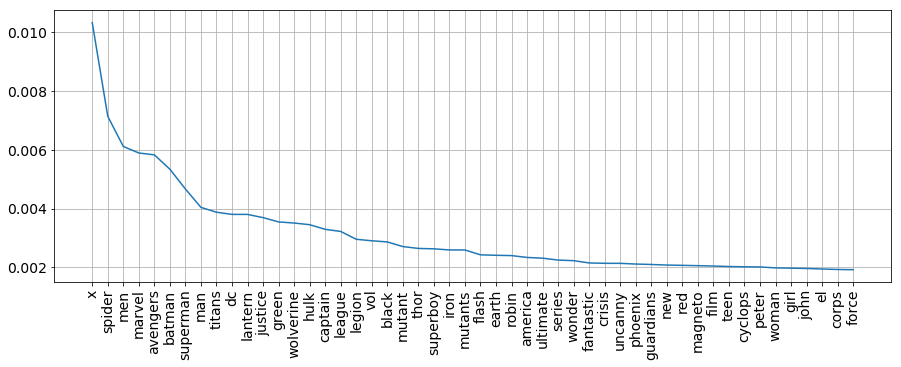

Cantidad de palabras: 33348


In [20]:
import copy
import operator
from collections import OrderedDict

idf_dict_comics2 = copy.copy(idf_dict_comics)
for w in idf_dict_comics2.keys():
    idf_dict_comics2[w] = idf_dict_comics2.get(w) * most_common_words.freq(w)

idf_dict_comics2 = OrderedDict(sorted(idf_dict_comics2.items(), 
                                      key=operator.itemgetter(1), reverse=True))

keys = list(idf_dict_comics2.keys())
values = list(idf_dict_comics2.values())

plt.figure(figsize=(15, 5))
plt.plot(range(50), values[:50])
plt.xticks(range(50), keys[:50], rotation='vertical')
plt.grid()
plt.show()

print("Cantidad de palabras:", len(keys))

La cantidad de palabras el lexicón aún es muy grande. Usualmente, para continuar la limpieza se requiere del uso de *heurísticas*, que son obtenidas tras observar generalidades del lenguaje y de la fuente utilizados.

Dentro del conjunto de palabras anterior aparecen muchas que, aunque aparecen muchas veces en pocos documentos, carecen de significado, por ejemplo, palabras de longitud pequeña (de 1 o 2 caracteres). A continuación, imprimimos las primeras 25 palabras cortas encontradas, junto con su valor de utilidad:

In [21]:
uselessWords = 0
print("Palabra \tUtilidad")
for i in range(len(keys)):
    if(len(keys[i]) <= 2):
        uselessWords += 1
        if (uselessWords < 25):
            print(keys[i], "\t", values[i])
        
print("\nPalabras poco útiles:", uselessWords)

Palabra 	Utilidad
x 	 0.010336012840994049
dc 	 0.003800044781399735
el 	 0.001938820054955653
tv 	 0.0012289684310453906
dr 	 0.0011053596634125011
p 	 0.0010210014692783429
ii 	 0.0009348439007458303
ar 	 0.0009260920805695711
mr 	 0.0009237692242232916
go 	 0.0008555655992217727
w 	 0.000849983561492302
vs 	 0.0008387059418945339
ms 	 0.0008347352656907502
v 	 0.0008230332356995913
us 	 0.0008176387168675143
j 	 0.0008036777616556524
th 	 0.0007824861240349308
px 	 0.0007185368123605618
al 	 0.0006707370171967123
jr 	 0.0006670144308393281
oa 	 0.0006546993533646252
st 	 0.0006239498898071535
l 	 0.0005629719918298124
co 	 0.0005537960435073883

Palabras poco útiles: 292


Observamos que algunas palabras cortas como "*x*", con significado obvio en "*x men*", tienen un valor de utilidad relativamente alto (utilidad > 0.01), mientras que palabras cortas sin significado útil aparente, como "co", tienen un valor de utilidad relativamente bajo (utilidad < 0.001), por lo que este puede ser uno de los criterios para eliminar palabras sin utilidad. Extendiendo esta idea, analicemos cuantas veces son utilizadas las palabras con utilidad menor a un cierto valor dado, digamos, por ejemplo, $5\times 10^{-5}$:

In [22]:
uselessWords = 0
for i in range(len(keys)):
    if(values[i] < 5e-5):
        uselessWords += 1
        if(uselessWords<25):
            print(keys[i], int(most_common_words.freq(keys[i])*most_common_words.N()))
        
print("\nPalabras poco útiles:", uselessWords)

furry 14
jensen 14
bracelet 14
seagle 14
relentless 14
jokester 14
paint 14
epoch 14
hecatomb 14
herron 14
claus 14
hounds 14
infringement 14
codex 14
superia 14
chin 14
sadly 16
fooled 16
secured 16
distinction 16
filmed 16
combatants 16
confuse 16
waited 16

Palabras poco útiles: 21175


Observamos que estas palabras no son particularmente útiles para describir el tema de interés. Este sería un segundo criterio de eliminación. Con estas condiciones podemos restringir las palabras del lexicón:

In [23]:
new_keys = [item[0] for item in zip(keys, values) 
            if not ((item[1] < 0.001 and len(item[0]) <= 2) or item[1] < 5e-5)]

comicsDf["main_words"] = list(map(lambda row: [w for w in row if w in new_keys], 
                                  comicsDf.words_wsw))

display(comicsDf.head())
print("\nPalabras útiles:", len(new_keys))

,name,description,words_wsw,main_words
0,'Mazing Man,mazing man is the title character of a comic book series created by bob rozakis and stephen destefano and published by dc comics the series ran fo...,"[mazing, man, title, character, comic, book, series, created, bob, rozakis, stephen, destefano, published, dc, comics, series, ran, twelve, issues...","[man, title, character, comic, book, series, created, bob, rozakis, stephen, published, dc, comics, series, ran, twelve, issues, additional, speci..."
1,711 (Quality Comics),is a fictional superhero from the golden age of comics he was created by george brenner and published by quality comics first appeared in police c...,"[fictional, superhero, golden, age, comics, created, george, brenner, published, quality, comics, first, appeared, police, comics, august, lasted,...","[fictional, superhero, golden, age, comics, created, george, published, quality, comics, first, appeared, police, comics, august, lasted, january,..."
2,Abigail Brand,special agent special agent abigail brand is a fictional character appearing in american comic book s published by marvel comics publication histo...,"[special, agent, special, agent, abigail, brand, fictional, character, appearing, american, comic, book, published, marvel, comics, publication, h...","[special, agent, special, agent, abigail, brand, fictional, character, appearing, american, comic, book, published, marvel, comics, publication, h..."
3,Abin Sur,abin sur is a fictional character and a superhero from the dc comics dc universe he was a member of the green lantern corps and is best known as t...,"[abin, sur, fictional, character, superhero, dc, comics, dc, universe, member, green, lantern, corps, best, known, predecessor, green, lantern, ha...","[abin, sur, fictional, character, superhero, dc, comics, dc, universe, member, green, lantern, corps, best, known, predecessor, green, lantern, ha..."
4,Abner Jenkins,abner ronald jenkins formerly known as the beetle comics beetle mach iv mach v mach vii and currently known as mach x and is a fictional character...,"[abner, ronald, jenkins, formerly, known, beetle, comics, beetle, mach, iv, mach, v, mach, vii, currently, known, mach, x, fictional, character, a...","[abner, ronald, jenkins, formerly, known, beetle, comics, beetle, mach, mach, mach, vii, currently, known, mach, x, fictional, character, appearin..."



Palabras útiles: 12052


In [24]:
#Guardar La base de datos para posteriores usos
new_comicsDf = comicsDf.drop('words_wsw', axis=1)
new_comicsDf.to_json("Comics/clean_comics.json", orient='records') 

## Conclusiones

El análisis léxico en su forma más simple se limita a identificar términos válidos en un texto, lo cual a su vez se reduce en muchas ocasiones a fragmentar el texto en tokens. En este enfoque el análisis léxico consiste, básicamente, en un proceso de tokenización. Un enfoque muchas veces preferido es realizar esa identificación de términos válidos mediante un lexicón/ diccionario. Este diccionario puede ser genérico, sin embargo, es preferible construir diccionarios *ad hoc* al contexto. La construcción de un lexicón es un proceso complejo que puede automatizarse en cierta medida.

<hr style="border-width: 3px;">

### Tarea 3

Realice las operaciones presentadas en esta lección para construir un lexicón apropiado para su proyecto.

**Fecha de entrega**: Martes 5 de septiembre.